# BilbyAnalysis.ipynb

Maria Okounkova (mokounkova@flatironinstitute.org)

### Notebook for the analysis of Bilby runs, including corner plots and evidences

### Imports

In [2]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import corner
from astropy import constants as const
from math import pi

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

### Functions for injection values, Bayes factors, evidences, etc

In [3]:
LabelDict = {'chirp_mass' : r"$\mathcal{M} [M_\odot]$", 'mass_ratio' : r"$q$", \
             'a_1' : r"$a_1$", 'a_2' : r"$a_2$", 'luminosity_distance' : r"$d_L$ [mpc]", \
            'dec' : 'dec', 'ra' : 'ra', 'theta_jn' : r"$\theta_{jn}$", 'tilt_1' : r"$\theta_1$", \
            'tilt_2' : r"$\theta_2$", 'psi' : r"$\psi$", 'phase' : r'$\Delta \phi$'}
    
def GetTruthDict(p):
    """ Return a dictionary of truth values for corner plots from the parameters.json file 
        corresponding to the injected parameters, where p is the path to the file """
    TruthDict = {}
    
    f = open(p + '/parameters.json')
    params = json.load(f)
    TruthDict['chirp_mass'] = params['chirp_mass']
    TruthDict['mass_ratio'] = params['mass_ratio']
    TruthDict['mass'] = params['mass']
    TruthDict['luminosity_distance'] = params['dist_mpc']
    TruthDict['a_1'] = np.abs(params['a_1'][2]) ## assumes aligned spin for now
    TruthDict['a_2'] = np.abs(params['a_2'][2])
    TruthDict['dec'] = params['dec']
    TruthDict['ra'] = params['ra']
    TruthDict['theta_jn'] = params['theta']
    TruthDict['tilt_1'] = 0.0
    TruthDict['tilt_2'] = np.pi
    TruthDict['phase'] = params['phi']
    TruthDict['psi'] = params['pol'] 
    f.close()
    return TruthDict

## Dictionary mapping the various runs with priors in question to labels
ps_dict = {"Test_FullSearchNoTiltNoSkyLoc_35_0p99" : r"All parameter except tilt and sky loc search, $f_\mathrm{min}$ = 35, $a_\mathrm{max}$ = 0.99", 
          "Test_FullSearchNoTilt_35_0p99" : r"Aligned-spin search, $f_\mathrm{min}$ = 35 Hz, $a_\mathrm{max}$ = 0.99", # SNR_net = 95
          "Test_FullSearch_35_0p99" : r"Unanligned-spin search, $f_\mathrm{min}$ = 35 Hz, $a_\mathrm{max}$ = 0.99", # SNR = 95
          "Test_FullSearch_35_0p75" : r"Unanligned-spin search, $f_\mathrm{min}$ = 35 Hz, $a_\mathrm{max}$ = 0.75", # SNR = 95
           "Test_FullSearch_25_0p75" : r"Unanligned-spin search, $f_\mathrm{min}$ = 25 Hz, $a_\mathrm{max}$ = 0.75", # SNR = 95
           "Test_Sur_35_0p99"  : r"Surrogate injection, All parameter search, $f_\mathrm{min}$ = 35 Hz, $a_\mathrm{max}$ = 0.99, SNR = 75",
           "Test_FullSearchNoTilt_25_0p75" : r"Aligned-spin search, $f_\mathrm{min}$ = 25 Hz, $a_\mathrm{max}$ = 0.75",
           "Test_FullSearchNoTilt_35_0p75" : r"Aligned-spin search, $f_\mathrm{min}$ = 35 Hz, $a_\mathrm{max}$ = 0.75",
           "dCS_0p0_25" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 25, $\ell = 0$",
           "dCS_0p0_75" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 75, $\ell = 0$",
           "dCS_0p0_125" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 125, $\ell = 0$",
           "dCS_0p3_25" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 25, $\ell = 0.3$",
           "dCS_0p3_75" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 75, $\ell = 0.3$",
           "dCS_0p3_125" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 125, $\ell = 0.3$",
           "dCS_0p35_25" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 25, $\ell = 0.35$",
           "dCS_0p35_75" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 75, $\ell = 0.35$",
           "dCS_0p35_125" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 125, $\ell = 0.35$",
           "dCS_0p37_25" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 25, $\ell = 0.37$",
           "dCS_0p37_75" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 75, $\ell = 0.37$",
           "dCS_0p37_125" : r"All parameter except tilt and sky loc search, $a_\mathrm{max}$ = 0.99, SNR = 125, $\ell = 0.37$",
           "NoTilt_dCS_0p0_125" : r"SNR = 125, $\ell = 0.0$",
           "NoTilt_dCS_0p0_75" : r"SNR = 75, $\ell = 0.0$",
           "NoTilt_dCS_0p0_25" : r"SNR = 25, $\ell = 0.0$",
           "NoTilt_dCS_0p25_125" : r"SNR = 125, $\ell = 0.25$",
           "NoTilt_dCS_0p25_75" : r"SNR = 75, $\ell = 0.25$",
           "NoTilt_dCS_0p25_25" : r"SNR = 25, $\ell = 0.25$",
           "NoTilt_dCS_0p3_125" : r"SNR = 125, $\ell = 0.3$",
           "NoTilt_dCS_0p3_75" : r"SNR = 75, $\ell = 0.3$",
           "NoTilt_dCS_0p3_25" : r"SNR = 25, $\ell = 0.3$",
           "NoTilt_dCS_0p35_125" : r"SNR = 125, $\ell = 0.35$",
           "NoTilt_dCS_0p35_75" : r"SNR = 75, $\ell = 0.35$",
           "NoTilt_dCS_0p35_25" : r"SNR = 25, $\ell = 0.35$",
           "NoTilt_dCS_0p37_125" : r"SNR = 125, $\ell = 0.37$",
           "NoTilt_dCS_0p37_75" : r"SNR = 75, $\ell = 0.37$",
           "NoTilt_dCS_0p37_25" : r"SNR = 25, $\ell = 0.37$",
          }

def Evidence(p):
    """ Return the log evidence for a given bilby run
        located in directory p """
    f = open(p + '/outdir/fast_tutorial_result.json')
    data = json.load(f)
    f.close()
    return data['log_evidence']

def NoiseEvidence(p):
    """ Return the log noise evidence for a given bilby run
        located in directory p """
    f = open(p + '/outdir/fast_tutorial_result.json')
    data = json.load(f)
    f.close()
    return data['log_noise_evidence']

def EvidenceErr(p):
    """ Return the error on the log evidence for a given bilby run 
        located in directory p """
    f = open(p + '/outdir/fast_tutorial_result.json')
    data = json.load(f)
    f.close()
    return data['log_evidence_err']

def BayesFactor(p):
    """ Return the log Bayes factor for a given bilby run 
        located in directory p """
    f = open(p + '/outdir/fast_tutorial_result.json')
    data = json.load(f)
    f.close()
    return data['log_bayes_factor']

def EvidenceAndBayes(p):
    """ Return the log Bayes factor, log evidence, and log evidence error
        for a given bilby run located in directory p """
    f = open(p + '/outdir/fast_tutorial_result.json')
    data = json.load(f)
    f.close()
    return data['log_bayes_factor'], data['log_evidence'], data['log_evidence_err']
    
def EvidenceAndBayesArray(p_array):
    """ Return the log Bayes factor, log evidence, and log evidence error
        for a set of bilby runs located in directories given in p_array """
    bfs = []
    evs = []
    ev_errs = []
    for p in p_array:
        bf, ev, ev_err = EvidenceAndBayes(p)
        print(f, bf)
        bfs.append(bf)
        evs.append(ev)
        ev_errs.append(ev_err)
    return bfs, evs, ev_errs

def GetPosterior(p, quantity):
    """ Return the posterior for a given bilby run
        for a given quantity, such as mass_ratio, 
        chirp_mass, a_1, a_2, etc"""
    f = open(p + '/fast_tutorial_result.json')
    data = json.load(f)
    vals = data['posterior']['content'][quantity]
    f.close()
    return vals

def EllinKm(ell_string, mass):
    """ For dCS parameters, convert from the string corresponding
        to the dimensionless ell value (like `0p0`) to a value
        in kilometers (like 0.0 [km]) """
    ell = float(ell_string.replace('p', '.'))
    mass_msun = mass * const.M_sun
    phys_ell_km = ell * mass_msun * const.G /(const.c**2) / 1000
    return phys_ell_km.value



### Corner plot for GR injections with various SNRs

In [4]:
def SNRCornerPlot():
    """ Make a corner plot of Bilby runs on GR injections with various SNRs"""
    
    ## Quantities to plot, ranges, and labels
    quants = ['mass_ratio', 'chirp_mass', 'a_1', 'a_2']
    q_range = [(0.25, 1.0), (20, 40), (0.0, 1.0), (0.0, 1.0)]

    labels = [LabelDict[q] for q in quants]
    dim = len(quants) 

    snr_values = ["25", "75", "125"]
    cs = sns.color_palette('husl', n_colors=len(snr_values) + 1)

    ## Get true injection values
    p = '/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/dCS_0p0_25/'
    TruthDict = GetTruthDict(p)
    truths = [TruthDict[q] for q in quants]
    
    fig, ax_arr = plt.subplots(dim, dim, figsize=(10,10))
    x = [0.0, 0.0]
    y = [0.0, 0.0]
    handles = []
    
    for SNR, color in zip(snr_values, cs[1:]):

        ## GR injections for Bilby with various SNRs
        p = '/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/dCS_0p0_' + SNR + '/'
        vals = np.vstack([GetPosterior(p + 'outdir', q) for q in quants]).transpose()

        corner.corner(vals, fig=fig, labels=labels,
                     title_kwargs={"fontsize": 20}, label_kwargs={"fontsize": 20}, color=color, 
                      show_titles=False, smooth = 2.0, range = q_range, truths = truths, truth_color = 'black')

        ## Dealing with the legend
        l = ax_arr[0][dim-1].plot(x, y, label=SNR, color = color)
        handles.append(l[0])


    legend = ax_arr[0][dim-1].legend(handles=handles, frameon=False, title = r'SNR in H1', loc = 'upper center')
    plt.setp(legend.get_title(),fontsize=20)
    for ax in fig.get_axes():
        ax.tick_params(axis='both', labelsize=12, length=6)
        
    plt.tight_layout()
    plt.savefig('SNRCornerPlot.pdf')
    plt.show()
    
#SNRCornerPlot()  

### Corner plot for injections with various search settings

In [5]:
def PriorsCornerPlot():
    """ Make a corner plot of Bilby runs on GR injections with 
        various settings for the priors and f_min """
    
    ## Quantities to plot
    quants = ['mass_ratio', 'chirp_mass', 'a_1', 'a_2']
    q_range = [(0.2, 1.0), (25, 40), (0.0, 1.0), (0.0, 1.0)]
    labels = [LabelDict[q] for q in quants]
    dim = len(quants) 
    
    ps = ["Test_FullSearchNoTilt_25_0p75", "Test_FullSearchNoTilt_35_0p99", "Test_FullSearch_35_0p99"]
    #ps = ["NoTilt_dCS_0p0_25", "NoTilt_dCS_0p0_75", "NoTilt_dCS_0p0_125"]
    #ps = ["NoTilt_dCS_0p35_25", "NoTilt_dCS_0p35_75", "NoTilt_dCS_0p35_125"]
    run_labels = [ps_dict[pp] for pp in ps]
    #cs = sns.color_palette('crest', n_colors=len(ps) + 1)
    cs = ['#07f5d9', '#95d1ed', '#e66157']
    
    ## Injected values -- the same for all of the runs
    p = '/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/' + ps[0]
    TruthDict = GetTruthDict(p)
    truths = [TruthDict[q] for q in quants]
        
    fig, ax_arr = plt.subplots(dim, dim, figsize=(10,10))
    x = [0.0, 0.0]
    y = [0.0, 0.0]
    handles = []

    for p, color, rl in zip(ps, cs, run_labels):

        p = '/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/' + p
        vals = np.vstack([GetPosterior(p + '/outdir', q) for q in quants]).transpose()

        corner.corner(vals, fig=fig, labels=labels,
                     title_kwargs={"fontsize": 20}, label_kwargs={"fontsize": 20}, color=color, smooth = 1.0, 
                      show_titles=False, truths = truths, truth_color = 'gray', range = q_range)

        ## Dealing with the legend
        l = ax_arr[0][dim-1].plot(x, y, label=rl, color = color)
        handles.append(l[0])

    legend = ax_arr[0][2].legend(handles=handles, frameon=False, loc = 'upper center', fontsize=18)
    for ax in fig.get_axes():
        ax.tick_params(axis='both', labelsize=12, length=6)
    plt.savefig('BilbyGRCheck.pdf')
    plt.show()
    
#PriorsCornerPlot()  

### Corner plots for dCS injections

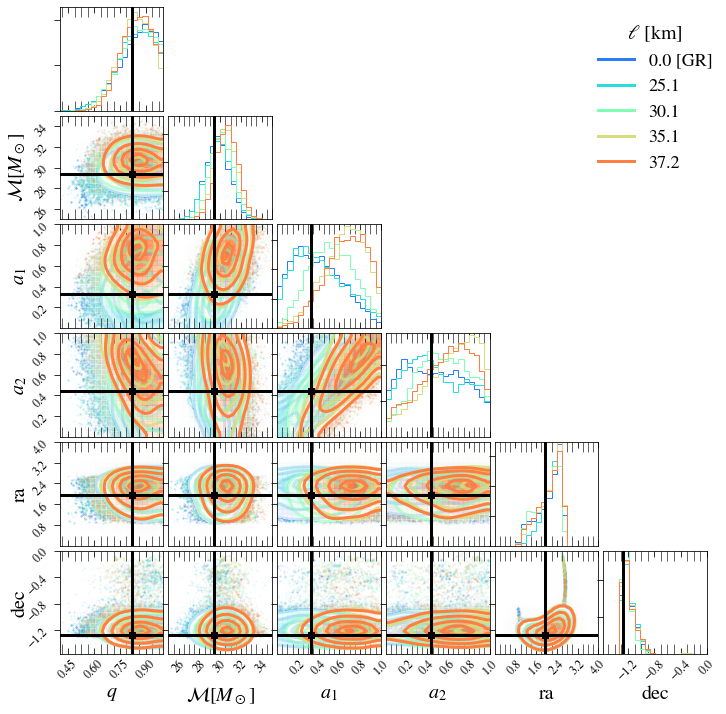

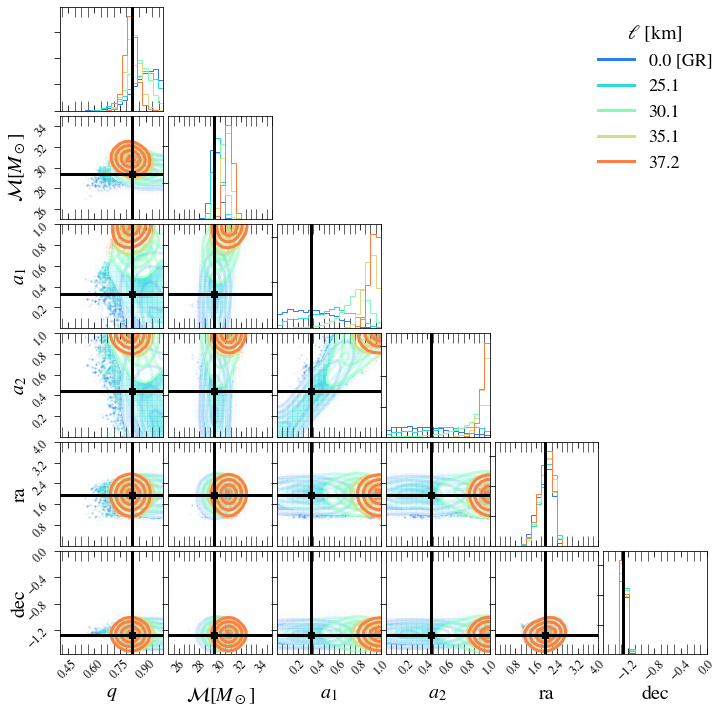

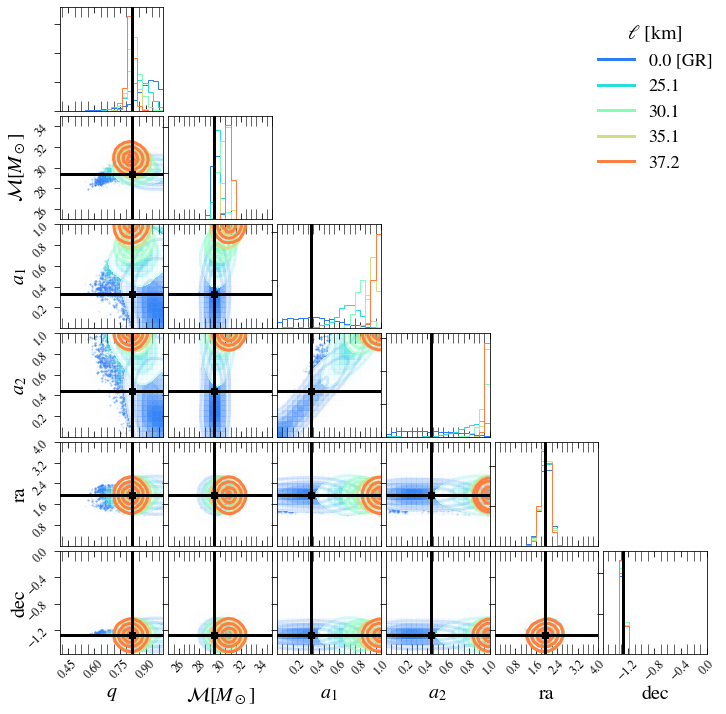

In [64]:
def dCSCornerPlot(SNR):
    """ Make a corner plot for Bilby runs on dCS injections with 
        various values of the coupling parameter.
        SNR refers to the signal to noise ratio of the run under consideration """
    
    ## Quantities to plot

    #quants = ['a_1', 'a_2'] 
    #q_range = [(0.0, 1.0), (0.0, 1.0)]
    quants = ['mass_ratio', 'chirp_mass', 'a_1', 'a_2', 'ra', 'dec']
    q_range = [(0.4, 1.0), (25, 35), (0.0, 1.0), (0.0, 1.0), (0.0, 4.0), (-pi/2, 0)]
    labels = [LabelDict[q] for q in quants]
    dim = len(quants) 

    ## dCS values to plot
    dcs_values = ["0p25", "0p3", "0p35", "0p37"]
    cs = sns.color_palette('rainbow', n_colors=len(dcs_values) + 1)

     
    fig, ax_arr = plt.subplots(dim, dim, figsize=(10,10))
    x = [0.0, 0.0]
    y = [0.0, 0.0]

    smooth = 1.5
    
    ## Read in the GR values and plot GR results
    p_gr = '/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/NoTilt_dCS_0p0_' + SNR + '/'
    TruthDict = GetTruthDict(p_gr)
    truths = [TruthDict[q] for q in quants]
    mass = TruthDict['mass']
    vals_gr = np.vstack([GetPosterior(p_gr + 'outdir', q) for q in quants]).transpose()

    corner.corner(vals_gr, fig=fig, labels=labels,
                  title_kwargs={"fontsize": 20}, label_kwargs={"fontsize": 20}, color=cs[0],
                  show_titles=False, truths = truths, truth_color = 'black', range = q_range, smooth = smooth)
    
    l_gr = ax_arr[0][dim-1].plot(x, y, label='%.1f [GR]' % EllinKm("0p0", mass), color = cs[0])
    handles = [l_gr[0]]

    ## Read in the dCS data and plot
    for ell, color in zip(dcs_values, cs[1:]):

        p = '/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/NoTilt_dCS_' + ell + '_' + SNR + '/'
        vals = np.vstack([GetPosterior(p + 'outdir', q) for q in quants]).transpose()

        corner.corner(vals, fig=fig, labels=labels,
                     title_kwargs={"fontsize": 20}, label_kwargs={"fontsize": 20}, color=color, 
                      show_titles=False, range = q_range, smooth = smooth)

        l = ax_arr[0][dim-1].plot(x, y, label='%.1f' % EllinKm(ell, mass), color = color)
        handles.append(l[0])


    legend = ax_arr[0][dim-1].legend(handles=handles, frameon=False, title = r'$\ell$ [km]', loc = 'upper center')
    plt.setp(legend.get_title(),fontsize=20)
    for ax in fig.get_axes():
        ax.tick_params(axis='both', labelsize=12, length=6)
    plt.savefig('dCSCorner_' + SNR + '.pdf')
    plt.show()
    
dCSCornerPlot('25')
dCSCornerPlot('75')
dCSCornerPlot('125')

### Phase and polarization plot

In [7]:
def PhasePolarizationPlot():
    """ Plot phase and polarization reconstruction """
    
    ## Quantities to plot
    quants = ['phase', 'psi']
    q_range = [(-0.1, 2*pi), (0, 2*pi)]
    labels = [LabelDict[q] for q in quants]
    dim = len(quants) 

    ps = ["NoTilt_dCS_0p0_75"]
    
    run_labels = [ps_dict[pp] for pp in ps]
    cs = sns.color_palette('crest', n_colors=len(ps) + 1)

    ## Injected values -- the same for all of the runs
    p = '/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/' + ps[0]
    TruthDict = GetTruthDict(p)
    truths = [TruthDict[q] for q in quants]
    truths[0] = pi - truths[0]
    print(truths)
        
    fig, ax_arr = plt.subplots(dim, dim, figsize=(10,10))
    x = [0.0, 0.0]
    y = [0.0, 0.0]
    handles = []

    for p, color, rl in zip(ps, cs, run_labels):

        p = '/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/' + p
        vals = np.vstack([GetPosterior(p + '/outdir', q) for q in quants]).transpose()

        corner.corner(vals, fig=fig, labels=labels,
                     title_kwargs={"fontsize": 20}, label_kwargs={"fontsize": 20}, color=color, smooth = 1.0, 
                      show_titles=False, truths = truths, truth_color = 'gray', range = q_range)

        ## Dealing with the legend
        l = ax_arr[0][dim-1].plot(x, y, label=rl, color = color)
        handles.append(l[0])

    legend = ax_arr[0][1].legend(handles=handles, frameon=False, loc = 'upper center', fontsize=18)
    for ax in fig.get_axes():
        ax.tick_params(axis='both', labelsize=12, length=6)
    plt.savefig('PhasePolarization.pdf')
    plt.show()
    
#PhasePolarizationPlot()

### Plot Bayes factors as a function of SNR Bilby runs

In [8]:
def PlotBayesSNR():
    """ Plot Bayes factors for various dCS parameters as a function of SNR """
    
    base_dir = "/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/"
    mass = 68
    
    ells = ["0p0","0p25", "0p3", "0p35", "0p37"]
    colors = ['black', 'violet', 'pink', 'lightblue', 'orange']
    snrs = [25, 75, 125]
    
    plt.figure(figsize=(10, 5))
    
    for ell, color in zip(ells, colors):

        bayes_arr = []

        for snr in snrs:

            p = base_dir + "NoTilt_dCS_" + ell + "_" + str(snr)
            bayes = BayesFactor(p)
            print(ell, snr, bayes)
            bayes_arr.append(bayes)

        plt.plot(snrs, bayes_arr, '--o', color = color, label = "$\ell$ = %.1f km" % EllinKm(ell, mass), markersize = 10)
        
    ## Add in 1/SNR^2 curve 
    SNRS = np.linspace(snrs[0], snrs[-1], 100)
    snr_curve = SNRS**2.0
    plt.plot(SNRS, snr_curve, color='gray', label = r'$\sim \mathrm{SNR}^{2}$', alpha = 0.1, lw = 15.0)

    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Log Bayes Factor')
    plt.xlabel('SNR')
    plt.tight_layout()
    plt.savefig('BayesSNR.pdf')
    plt.show()
    
#PlotBayesSNR()

### Plot Bayes factors as a function of $\ell$ for Bilby Runs

In [9]:
def PlotBayesEll():

    base_dir = "/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/"
    mass = 68

    ells = ["0p0", "0p2", "0p25", "0p28", "0p3", "0p33", "0p35", "0p36", "0p37"]
    ell_vals = [EllinKm(ell, mass) for ell in ells]
    snr = 75

    bayes_arr = []
    evidence_arr = []
    noise_evidence_arr = []

    for ell in ells:

        print(ell)
        p = base_dir + "NoTilt_dCS_" + ell + "_" + str(snr)
        bayes_arr.append(BayesFactor(p))
        evidence_arr.append(Evidence(p))
        noise_evidence_arr.append(NoiseEvidence(p))
        
    fig, axes = plt.subplots(3, figsize=(7.5,12), sharex = True)

    axes[0].plot(np.array(ell_vals)**4, evidence_arr, '--o', color = '#f72f64', label = 'Log Evidence', markersize = 10)
    axes[1].plot(np.array(ell_vals)**4, noise_evidence_arr, '--o', color = '#68e1e3', label = 'Log Noise Evidence', markersize = 10)
    axes[2].plot(np.array(ell_vals)**4, bayes_arr, '--o', color = 'orange', label = 'Log Bayes Factor', markersize = 10)

    for ax in axes:
        ax.legend(fontsize=17, loc = 'upper left', frameon=False)
        ax.tick_params(axis='x', which='both', bottom=True, top=False) 
        ax.grid()

    plt.xlabel(r'($\ell$ [km])${}^4$')
    plt.tight_layout()
    plt.savefig('BayesEll.pdf')
    plt.show()

### Understanding Bilby minimum frequency values

Bilby parameter estimation with the surrogate model requires specifying a minimum frequency f_sur_min, and this minuimum frequency must be greater than the minimum frequency of the waveform injection. If this criterion is not met (ie we ask for a lower f_sur_min than the injection f_injection_min), then Bilby throws an error saying that the requested minimum frequency, f_bilby_requested, is < f_injection_min. However, in practice, the f_bilby_requested reported by Bilby error messages is NOT equal to f_sur_min, which doesn't make sense. However, we can explore the relationship between these two quantities using the surrogate injection below:

for configuration:

mass_ratio = 1.0
chirp_mass = 20.0
a_1 = 0.99
a_2 = 0.99
tilt_1 = 0.0
tilt_2 = 3.14159265359
phi_12 = 0.0
phi_jl = 0.0


In [10]:
def BilbyMinimumFrequency():
    
    sur_fmin = [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0]
    bil_fmin = [16.04293095, 16.69953829, 17.34314270, 17.97386363, 18.59182733, 19.19716692, 19.79002226, 20.37053975, \
              20.93887207, 21.49517785, 22.03962128, 22.57237175]
    ## Fit a relationship between the two
    fit = np.polyfit(sur_fmin, bil_fmin, 3)
    p = np.poly1d(fit)
    print(p)
    
    ## What the f_min should be for the run specified above
    fmin_should = 22.70617355 
    

    plt.figure(figsize=(8,8))

    plt.plot(sur_fmin, bil_fmin, '--o', color='red', label = 'values')
    plt.plot(sur_fmin, p(sur_fmin), label = 'quad fit', lw = 2.0, color = 'pink')

    plt.xlabel('Our requested minimum_frequency')
    plt.ylabel('Bilby reported requested fMin')

    plt.axhline(fmin_should, color='black', ls = '--', label = 'What Bilby says fMin should be')

    plt.legend()

    plt.show()

#BilbyMinimumFrequency()